In [1]:
import requests 
from bs4 import BeautifulSoup 
import random 
import pandas as pd 
import time 

In [2]:
title = "AI Demand in Malaysia" 
location = "Malaysia"

In [67]:

list_url = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Artificial%2BIntelligence%2B%28AI%29&location=Malaysia&start=275"

response = requests.get(list_url) 

list_data = response.text 
list_soup = BeautifulSoup(list_data, "html.parser")
page_jobs = list_soup.find_all("li")


In [ ]:
id_list = []

In [68]:


for job in page_jobs:
    base_card_div = job.find("div", {"class": "base-card"}) 
    job_id = base_card_div.get("data-entity-urn").split(":")[3]
    print(job_id)
    id_list.append(job_id)

4207354507
4121973276
4207718641
4216348528
4200582561
4171249127
4211025567
4210965957
4200265645
4206540763


In [69]:
job_list = []

for job_id in id_list:
    job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    job_response = requests.get(job_url) 
    print(job_response.status_code) 
    job_soup = BeautifulSoup(job_response.text, "html.parser") 
    job_post = {}
    try:
        job_post["job_title"] = job_soup.find("h2", {"class": "top-card-layout__title font-sans text-lg papabear:text-xl font-bold leading-open text-color-text mb-0 topcard__title"}).text.strip()
    except:
        job_post["job_title"] = None 
    try:    
        job_post["company_name"] = job_soup.find("a", {"class": "topcard__org-name-link topcard__flavor--black-link"}).text.strip()
    except: 
        job_post["company_name"] = None
    try:
        job_post["time_posted"] = job_soup.find("span", {"class": "posted-time-ago__text topcard__flavor--metadata"}).text.strip()
    except:
        job_post["time_posted"] = None
    try:
        job_post["location"] = job_soup.find("span", {"class": "topcard__flavor topcard__flavor--bullet"}).text.strip()
    except: 
        job_post["location"] = None

        
    job_list.append(job_post) 

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
429
429
429
429
200
429
200
200
429
429
429
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
429
200
200
200
429
429
200
200
429
429
429
200
200
429
429
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
429
200
200
200
200
429
200
200
200
429
429
429
429
429
200
429
200
429
429


In [70]:
id_list 

['4102520921',
 '4207547440',
 '4210198397',
 '4210126130',
 '4190232146',
 '4182801229',
 '4205762381',
 '4196341173',
 '4210655674',
 '4210199199',
 '4203172498',
 '4204806049',
 '4185449983',
 '4214656346',
 '4191646978',
 '4182662644',
 '4185416069',
 '4211285296',
 '4212620354',
 '4214539844',
 '4212630156',
 '4194514921',
 '4151067748',
 '4207183659',
 '4161447378',
 '4212993918',
 '3965679824',
 '3997533707',
 '4148666333',
 '4181271263',
 '4201841279',
 '4033390716',
 '4209660056',
 '4207004105',
 '4177825776',
 '4090789749',
 '4211785303',
 '4214023977',
 '3843744921',
 '4212554051',
 '4189590319',
 '4205469866',
 '4208049076',
 '4214964485',
 '4180685245',
 '4181589441',
 '4204743431',
 '4213182137',
 '4208978096',
 '4209656263',
 '4180065056',
 '4212370601',
 '4208892856',
 '4195286941',
 '4198525196',
 '4206858135',
 '4211036020',
 '4177534122',
 '4203219189',
 '4207548655',
 '4177895193',
 '4178737998',
 '4214943006',
 '4152388338',
 '4212305095',
 '4210569815',
 '42040927

In [20]:
job_list

[{'job_title': 'AI Business Analyst',
  'company_name': 'Mandrill Tech Sdn Bhd',
  'time_posted': '4 months ago',
  'location': 'Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia'},
 {'job_title': 'Machine Learning Engineer',
  'company_name': 'Finexus Group',
  'time_posted': '2 weeks ago',
  'location': 'WP. Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia'},
 {'job_title': 'Intern - Data Scientist (Data Analytics), Mobility',
  'company_name': 'Grab',
  'time_posted': '1 week ago',
  'location': 'Petaling Jaya, Selangor, Malaysia'},
 {'job_title': 'Associate Data Scientist',
  'company_name': 'Snappymob',
  'time_posted': '1 week ago',
  'location': 'Taman Wilayah, Federal Territory of Kuala Lumpur, Malaysia'},
 {'job_title': 'AI Specialist',
  'company_name': 'CelcomDigi',
  'time_posted': '2 weeks ago',
  'location': 'Subang Jaya, Selangor, Malaysia'},
 {'job_title': 'AI Prompt Engineer',
  'company_name': 'World MasterClass',
  'time_posted': '1 month ago',
  'lo

In [71]:
jobs_df = pd.DataFrame(job_list) 
jobs_df

,job_title,company_name,time_posted,location
0,AI Business Analyst,Mandrill Tech Sdn Bhd,4 months ago,"Kuala Lumpur, Federal Territory of Kuala Lumpu..."
1,Machine Learning Engineer,Finexus Group,2 weeks ago,"WP. Kuala Lumpur, Federal Territory of Kuala L..."
2,"Intern - Data Scientist (Data Analytics), Mobi...",Grab,1 week ago,"Petaling Jaya, Selangor, Malaysia"
3,Associate Data Scientist,Snappymob,1 week ago,"Taman Wilayah, Federal Territory of Kuala Lump..."
4,AI Specialist,CelcomDigi,2 weeks ago,"Subang Jaya, Selangor, Malaysia"
...,...,...,...,...
105,Senior AI Specialist,Nexperia,2 days ago,"Seremban, Negri Sembilan, Malaysia"
106,None,None,None,None
107,"Snr Exec/ AM, Facultative Reinsurance Placemen...",Allianz Malaysia,1 week ago,"Kuala Lumpur, Federal Territory of Kuala Lumpu..."
108,None,None,None,None


In [72]:
jobs_df_clean = jobs_df.dropna(subset=["job_title", "company_name", "location"])

print(f"✅ Total cleaned jobs: {len(jobs_df_clean)}")
jobs_df_clean.head()

✅ Total cleaned jobs: 84


,job_title,company_name,time_posted,location
0,AI Business Analyst,Mandrill Tech Sdn Bhd,4 months ago,"Kuala Lumpur, Federal Territory of Kuala Lumpu..."
1,Machine Learning Engineer,Finexus Group,2 weeks ago,"WP. Kuala Lumpur, Federal Territory of Kuala L..."
2,"Intern - Data Scientist (Data Analytics), Mobi...",Grab,1 week ago,"Petaling Jaya, Selangor, Malaysia"
3,Associate Data Scientist,Snappymob,1 week ago,"Taman Wilayah, Federal Territory of Kuala Lump..."
4,AI Specialist,CelcomDigi,2 weeks ago,"Subang Jaya, Selangor, Malaysia"


In [74]:
jobs_df_clean.loc[:, "time_posted"] = jobs_df_clean["time_posted"].fillna("Not specified")

In [75]:
jobs_df_clean = jobs_df_clean.drop_duplicates()
print(f"✅ Total unique jobs: {len(jobs_df_clean)}")

✅ Total unique jobs: 84


In [77]:
import os
os.makedirs("../data/processed", exist_ok=True)

In [78]:
jobs_df_clean.to_csv("../data/processed/linkedin_ai_jobs_malaysia_clean.csv", index=False)


In [80]:
jobs_df.to_csv("/Users/t.mo./Desktop/DSEP/Malaysia-AI-Readiness/data/linkedin_ai_jobs_malaysia.csv", index=False)


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
jobs_df1 = pd.read_csv("/Users/t.mo./Desktop/DSEP/Malaysia-AI-Readiness/data/processed/linkedin_ai_jobs_malaysia_clean.csv")
print("✅ Data loaded successfully!")

✅ Data loaded successfully!


In [97]:
print(jobs_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     84 non-null     object
 1   company_name  84 non-null     object
 2   time_posted   84 non-null     object
 3   location      84 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB
None


In [98]:
print(jobs_df1.describe(include='all'))

                    job_title           company_name time_posted  \
count                      84                     84          84   
unique                     78                     67          17   
top     Senior Data Scientist  Keysight Technologies  1 week ago   
freq                        2                      4          23   

                                                 location  
count                                                  84  
unique                                                 18  
top     Kuala Lumpur, Federal Territory of Kuala Lumpu...  
freq                                                   21  


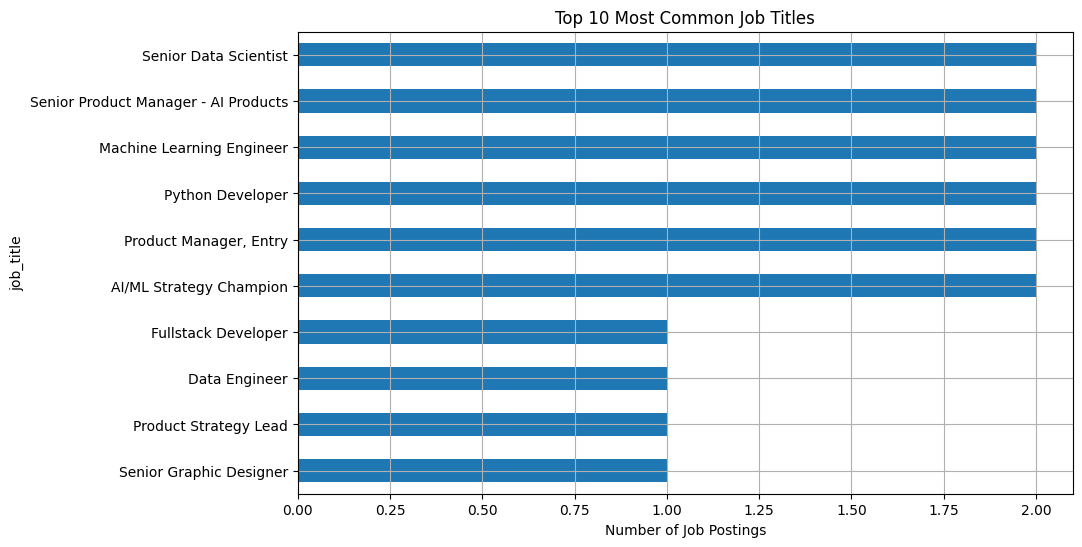

In [99]:
# Most Common Job Titles
plt.figure(figsize=(10,6))
jobs_df1['job_title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

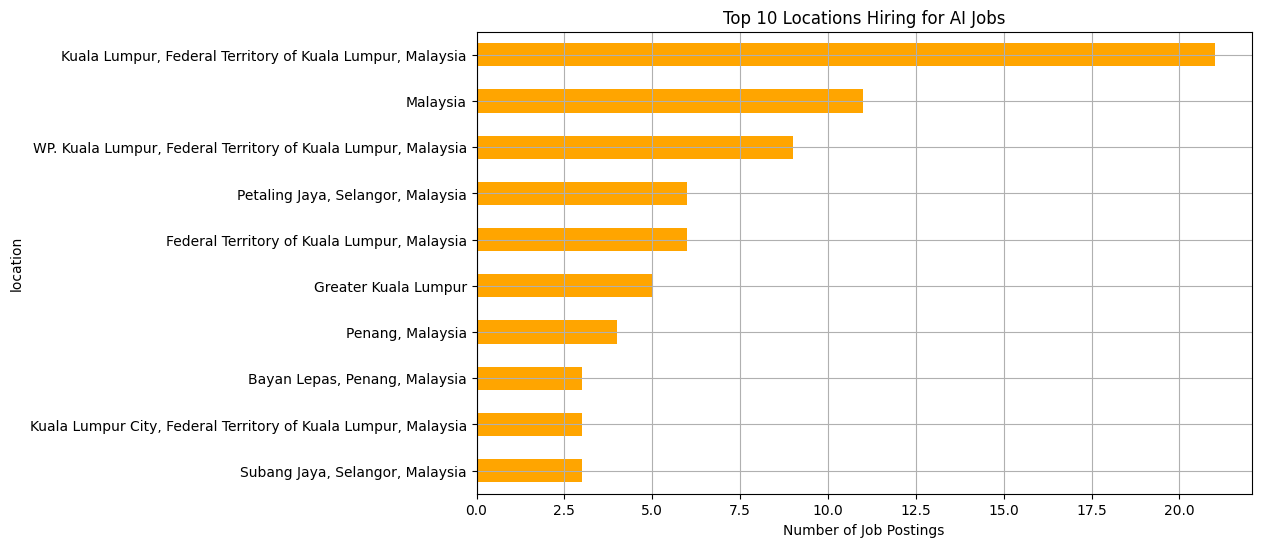

In [100]:
#most common locs 
plt.figure(figsize=(10,6))
jobs_df1['location'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Locations Hiring for AI Jobs')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

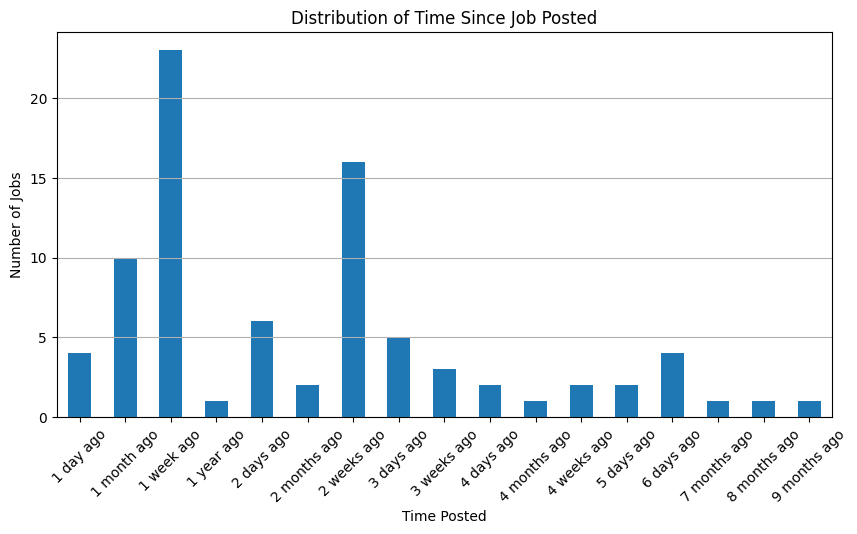

In [101]:
#time posted 
plt.figure(figsize=(10,5))
jobs_df1['time_posted'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Time Since Job Posted')
plt.xlabel('Time Posted')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [103]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [104]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


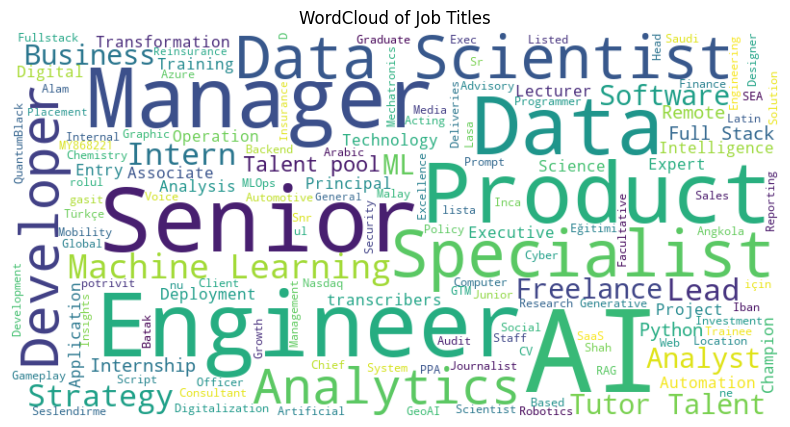

In [105]:
#wordcloud (trial) 
from wordcloud import WordCloud
text = " ".join(jobs_df1['job_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Job Titles')
plt.show()

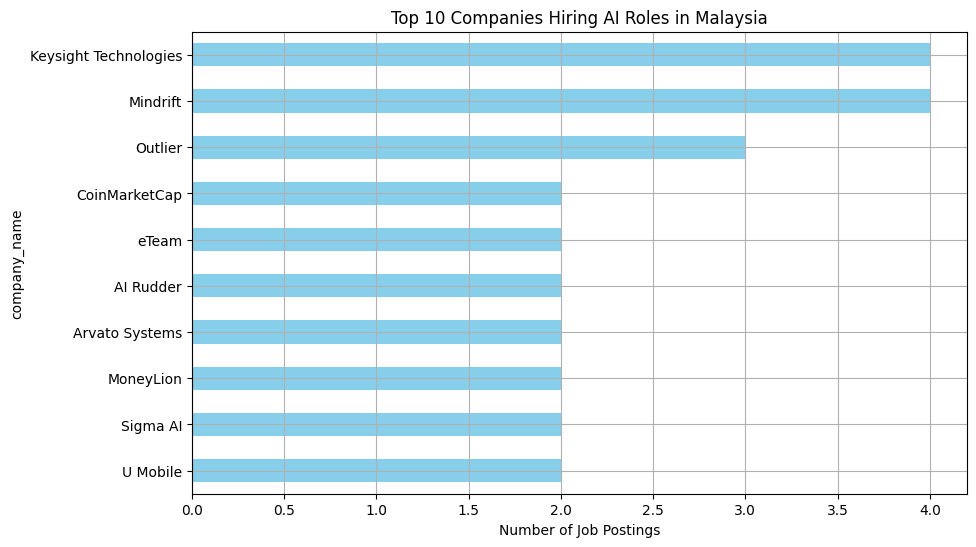

In [107]:
#top hiring firms 
plt.figure(figsize=(10,6))
jobs_df1['company_name'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Companies Hiring AI Roles in Malaysia')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

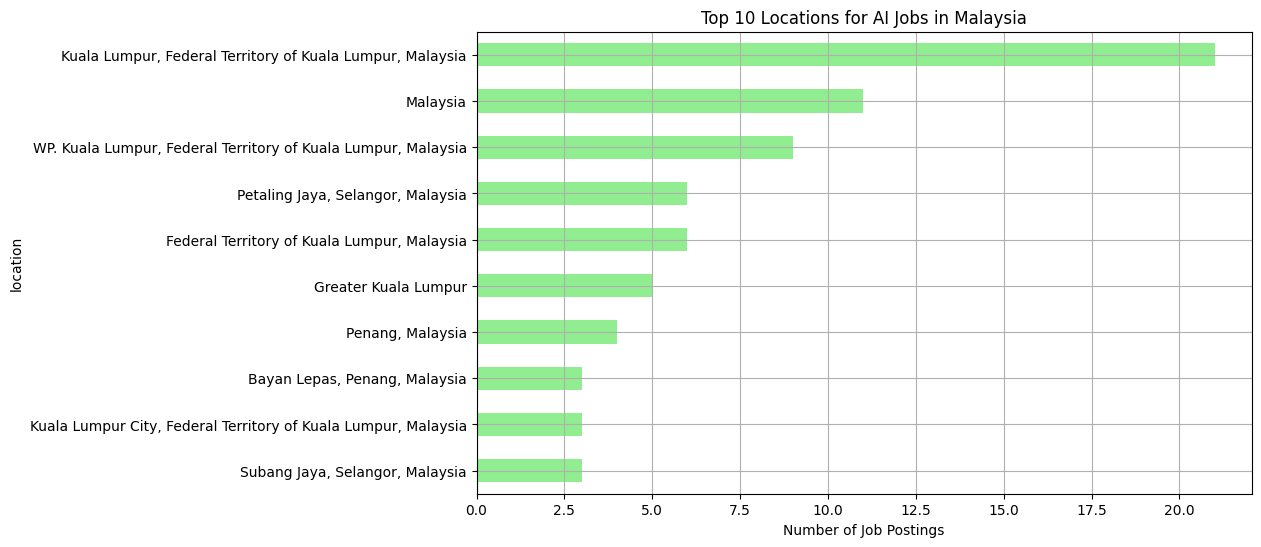

In [108]:
#top cities for ai jobs 
plt.figure(figsize=(10,6))
jobs_df['location'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Locations for AI Jobs in Malaysia')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

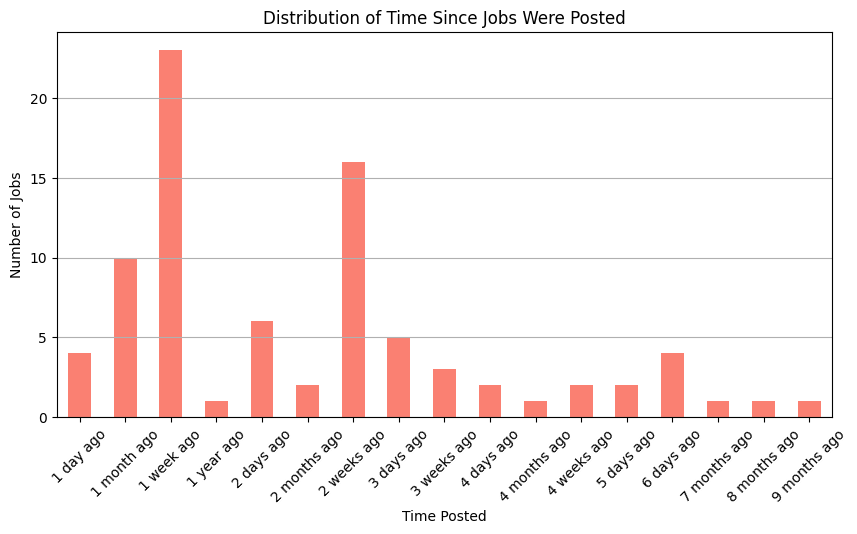

In [109]:
plt.figure(figsize=(10,5))
jobs_df['time_posted'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribution of Time Since Jobs Were Posted')
plt.xlabel('Time Posted')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

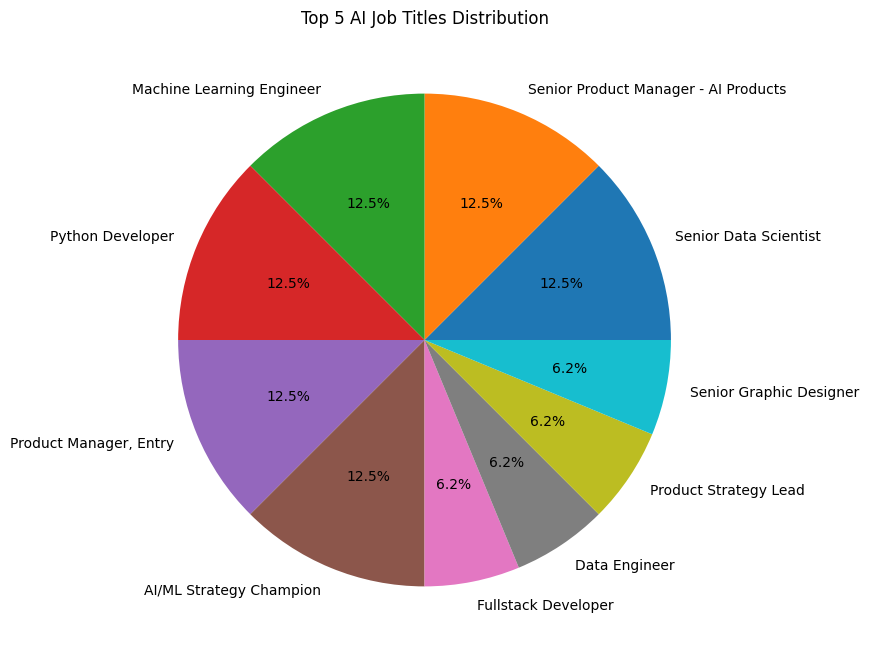

In [132]:
#pie chart 
top_titles = jobs_df['job_title'].value_counts().head(10)
top_titles.plot.pie(autopct='%1.1f%%', figsize=(8,8), title="Top 5 AI Job Titles Distribution")
plt.ylabel('')
plt.show()

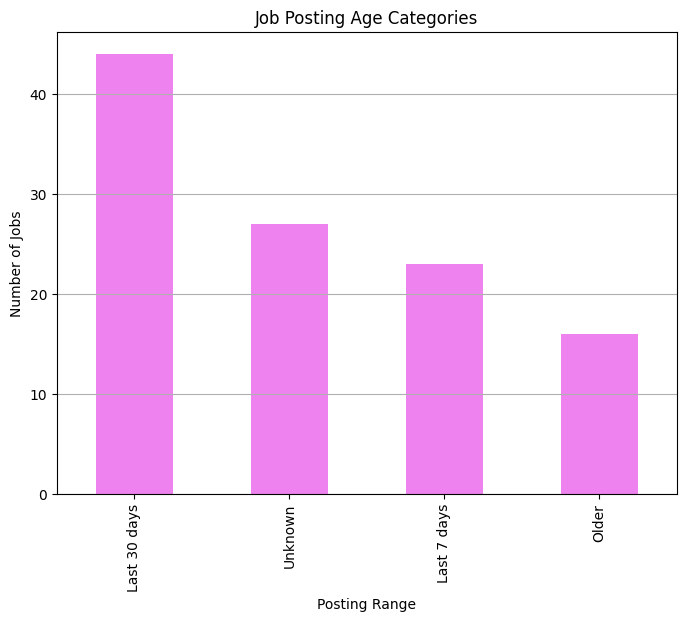

In [111]:
def categorize_posting(x):
    if pd.isna(x) or x == "Not specified":
        return "Unknown"
    if "day" in x or "days" in x:
        number = int(x.split()[0])
        if number <= 7:
            return "Last 7 days"
        elif number <= 30:
            return "Last 30 days"
        else:
            return "Older"
    if "week" in x:
        return "Last 30 days"
    if "month" in x:
        return "Older"
    return "Unknown"


jobs_df['posting_range'] = jobs_df['time_posted'].apply(categorize_posting)


plt.figure(figsize=(8,6))
jobs_df['posting_range'].value_counts().plot(kind='bar', color='violet')
plt.title('Job Posting Age Categories')
plt.xlabel('Posting Range')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()

In [112]:
pd.crosstab(jobs_df['company_name'], jobs_df['location']).head(10)

location,"Bandar Banang Jaya, Johore, Malaysia","Bayan Lepas, Penang, Malaysia","Cyberjaya, Selangor, Malaysia","Federal Territory of Kuala Lumpur, Malaysia",Greater Kuala Lumpur,"Kuala Lumpur City, Federal Territory of Kuala Lumpur, Malaysia","Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia",Malaysia,"Penang, Malaysia","Penang, Penang, Malaysia","Petaling Jaya, Selangor, Malaysia","Puchong, Selangor, Malaysia","Seremban, Negri Sembilan, Malaysia","Shah Alam, Selangor, Malaysia","Subang Jaya, Selangor, Malaysia","Taman Pulau Pinang, Penang, Malaysia","Taman Wilayah, Federal Territory of Kuala Lumpur, Malaysia","WP. Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia"
company_name,,,,,,,,,,,,,,,,,,
A Serious Company,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ADA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AFFIN Group,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AI Rudder,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Aarorn Technologies Inc,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Accenture Southeast Asia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Agilent Technologies,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allianz Malaysia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Ant International,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


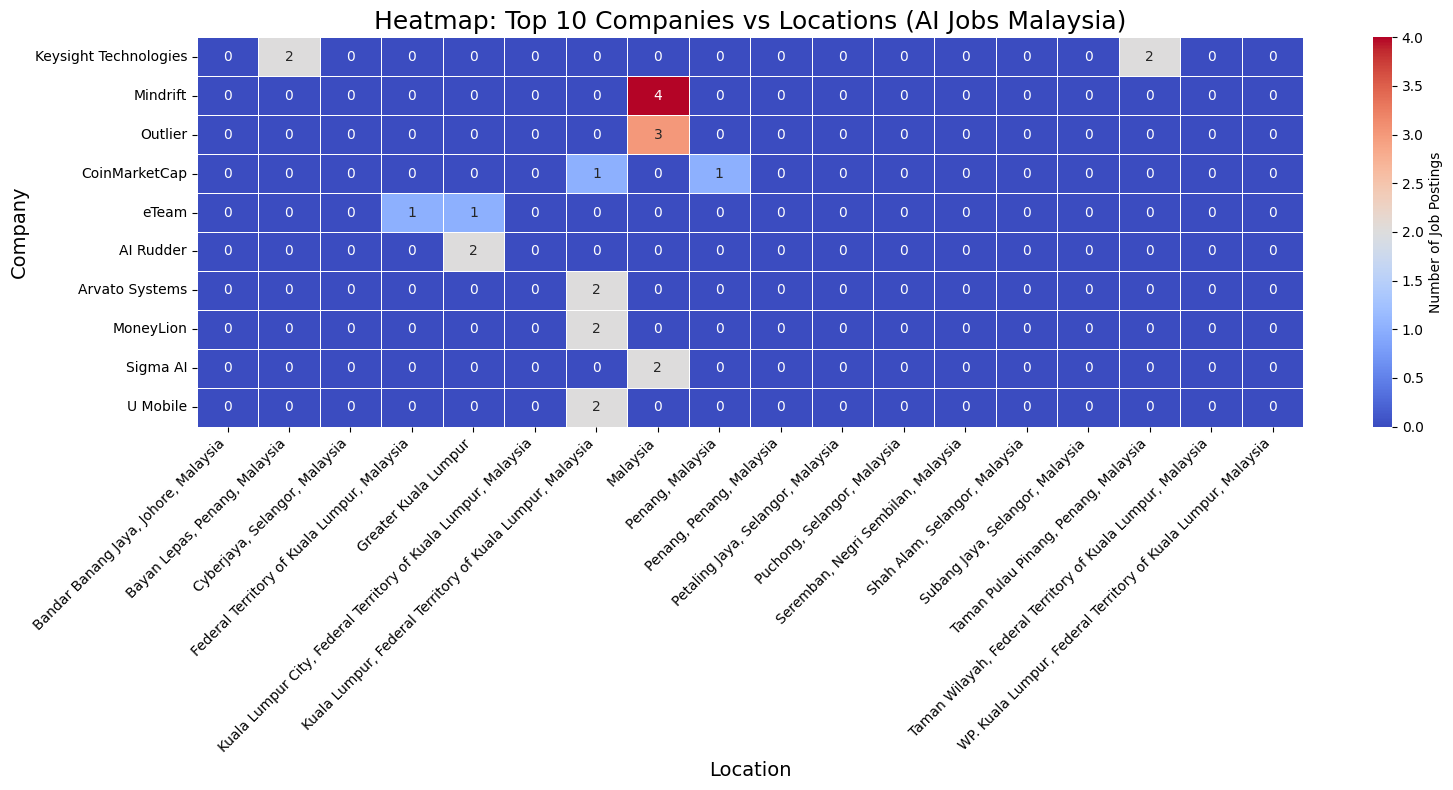

In [121]:


plt.figure(figsize=(16, 8))
ax = sns.heatmap(pivot_table_filtered, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d')

# Add colorbar label
colorbar = ax.collections[0].colorbar
colorbar.set_label('Number of Job Postings', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap: Top 10 Companies vs Locations (AI Jobs Malaysia)', fontsize=18)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.tight_layout()
plt.show()

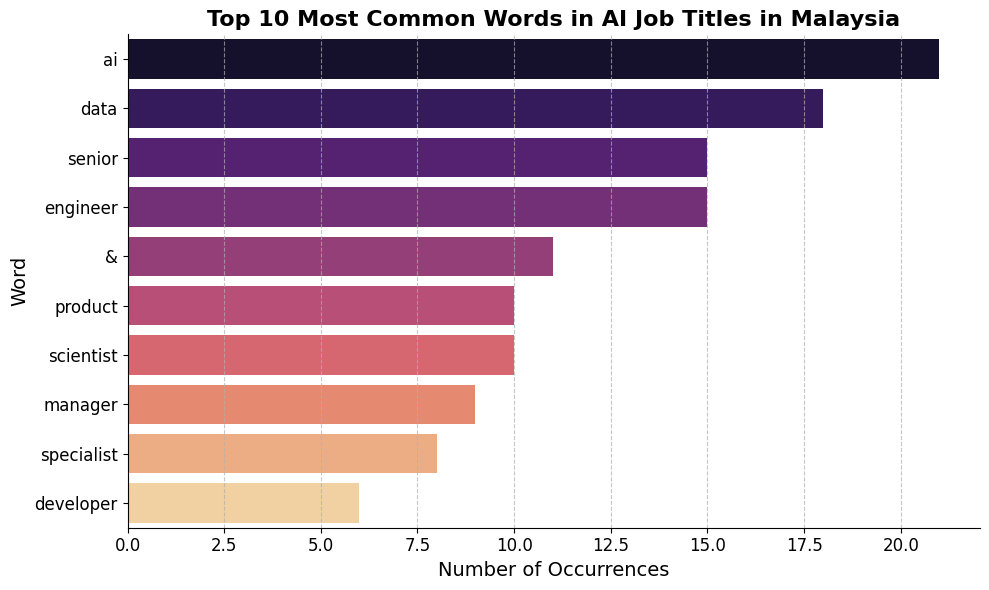

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x='Count', 
    y='Word', 
    data=common_words_df.head(10), 
    hue='Word', 
    legend=False, 
    palette='magma'
)


plt.title('Top 10 Most Common Words in AI Job Titles in Malaysia', fontsize=16, fontweight='bold')


plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Word', fontsize=14)

sns.despine() 
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

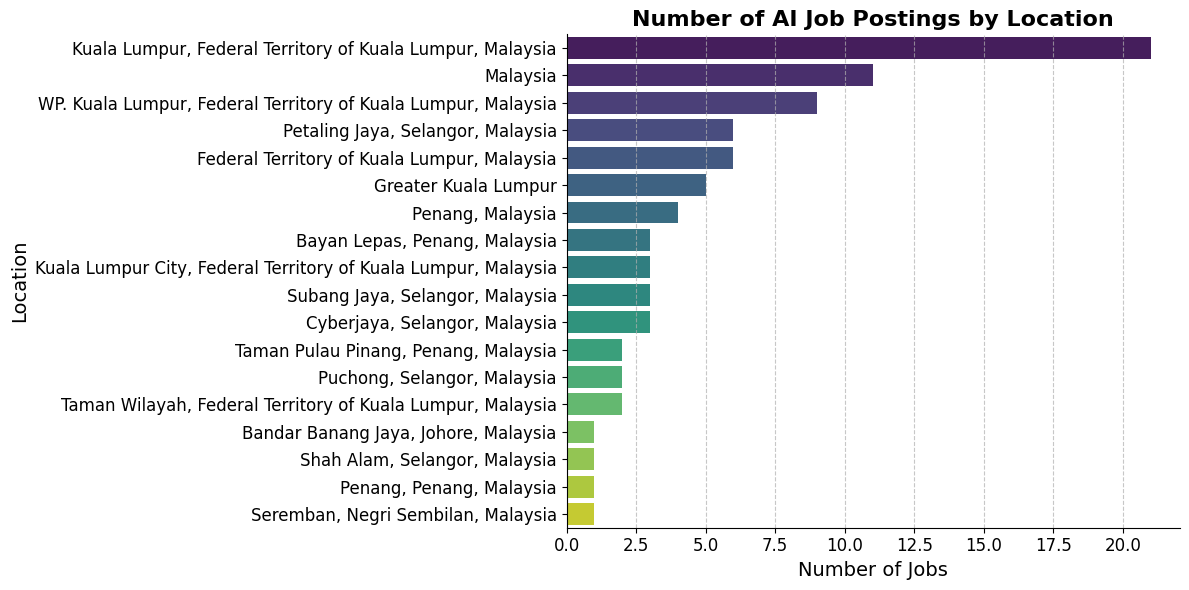

In [127]:
location_counts = jobs_df_clean['location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Job Count']

plt.figure(figsize=(12,6))
sns.barplot(
    x='Job Count', 
    y='Location', 
    data=location_counts, 
    palette='viridis', 
    hue='Location', 
    legend=False
)

plt.title('Number of AI Job Postings by Location', fontsize=16, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


location_cleaned
Kuala Lumpur    46
Selangor        15
Other           12
Penang          10
Johor            1
Name: count, dtype: int64


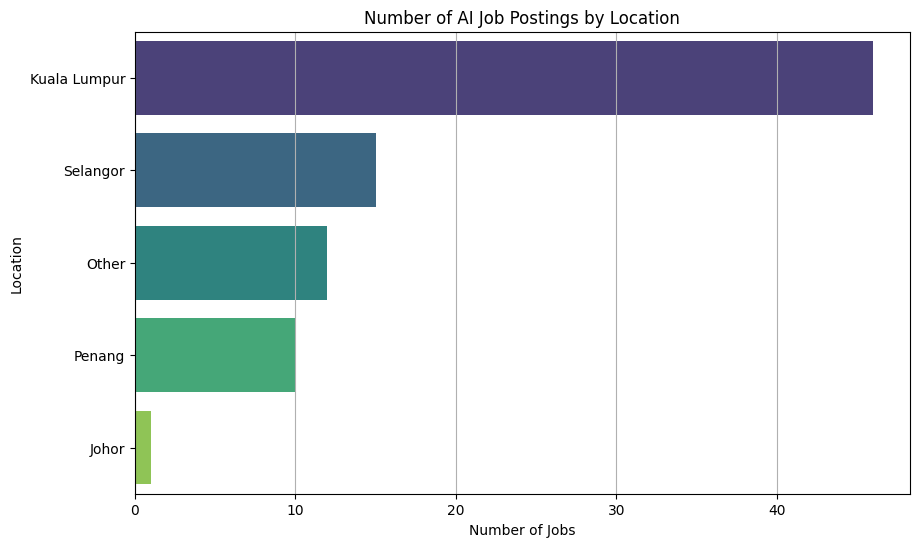

In [131]:
def clean_location(location):
    if pd.isnull(location):
        return 'Other'
    location = location.lower()
    if 'kuala lumpur' in location:
        return 'Kuala Lumpur'
    elif 'selangor' in location:
        return 'Selangor'
    elif 'penang' in location or 'pulau pinang' in location:
        return 'Penang'
    elif 'johor' in location or 'johore' in location:
        return 'Johor'
    elif 'negeri sembilan' in location:
        return 'Negeri Sembilan'
    else:
        return 'Other'

jobs_df_clean['location_cleaned'] = jobs_df_clean['location'].apply(clean_location)

print(jobs_df_clean['location_cleaned'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(
    data=jobs_df_clean,
    y='location_cleaned',
    hue='location_cleaned',   
    palette='viridis',
    order=jobs_df_clean['location_cleaned'].value_counts().index,
    legend=False              
)
plt.title('Number of AI Job Postings by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.grid(axis='x')
plt.show()